In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import pacf

In [15]:
#Parameters
kB = 1.38e-23 
m = 1.11e-14      #kg
R = 1e-6          #m
theta = 0.001       #Ns-1
gamma = 6*np.pi*theta*R     #coeffiecient
T = 300             #K
kx = 1e-6               
ky = 0.25e-6             
tau = m/gamma
n_steps = 10**5       # Simulation steps
num_trajectories = 10**3
dt = 1e-3

In [16]:
#5.4a
x_trapped = np.zeros(int(n_steps))
y_trapped = np.zeros(int(n_steps))
time = np.linspace(0, int(n_steps*dt), num = int(n_steps))

for n in range(1,n_steps):
    wx = np.random.randn()
    wy = np.random.randn()
    x_trapped[n] = x_trapped[n-1] - kx*x_trapped[n-1]*dt/gamma + np.sqrt(2*kB*T*dt/gamma)*wx
    y_trapped[n] = y_trapped[n-1] - ky*y_trapped[n-1]*dt/gamma + np.sqrt(2*kB*T*dt/gamma)*wy 

'''x_trapped = np.mean(x_trapped,axis = 0)
y_trapped = np.mean(y_trapped,axis = 0)'''

'x_trapped = np.mean(x_trapped,axis = 0)\ny_trapped = np.mean(y_trapped,axis = 0)'

(-385.689824318297, 365.26388175234956, -780.7647544262843, 672.5391429902327)

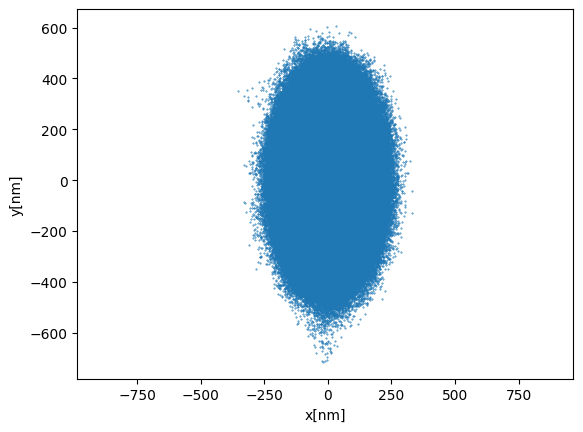

In [390]:
plt.plot(x_trapped*1e9, y_trapped*1e9,'.', markersize = 0.8)
plt.xlabel("x[nm]")
plt.ylabel("y[nm]")
plt.axis('equal')

In [391]:
#5.4 b
#Experimental
p_x, x_edge = np.histogram(x_trapped, bins = 200, density=True)
x_trapped_center = 0.5 * (x_edge[1:] + x_edge[:-1])

p_y, y_edge = np.histogram(y_trapped, bins = 200, density=True)
y_trapped_center = 0.5 * (y_edge[1:] + y_edge[:-1])

#Therorital
U_x = 0.5*kx*x_trapped_center**2
U_y = 0.5*ky*y_trapped_center**2

p_x_boltzman_unnormalize = np.exp(-U_x/(kB*T))
p_x_boltzman =  p_x_boltzman_unnormalize/(np.sum(p_x_boltzman_unnormalize)*(x_trapped_center[1]-x_trapped_center[0]))

p_y_boltzman_unnormalize = np.exp(-U_y/(kB*T))
p_y_boltzman =  p_y_boltzman_unnormalize/(np.sum(p_y_boltzman_unnormalize)*(y_trapped_center[1]-y_trapped_center[0]))

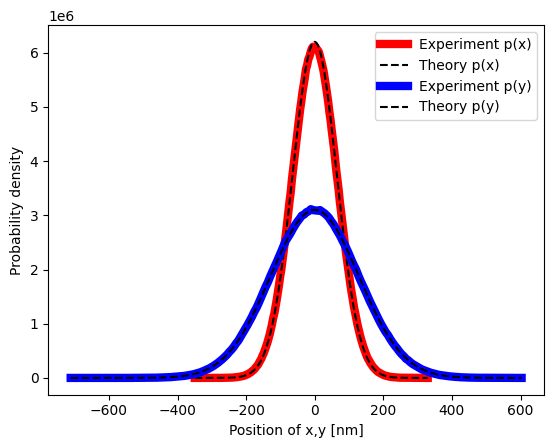

In [392]:
plt.plot(x_trapped_center*1e9, p_x, label = 'Experiment p(x)', color = 'r', linewidth = 6)
plt.plot(x_trapped_center*1e9, p_x_boltzman, label = 'Theory p(x)', linestyle ='--',color = 'black')
plt.plot(y_trapped_center*1e9, p_y, label = 'Experiment p(y)', color = 'b', linewidth = 6)
plt.plot(y_trapped_center*1e9, p_y_boltzman, label = 'Theory p(y)', linestyle ='--',color = 'black')
plt.xlabel("Position of x,y [nm]")
plt.ylabel("Probability density")
plt.legend()

C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

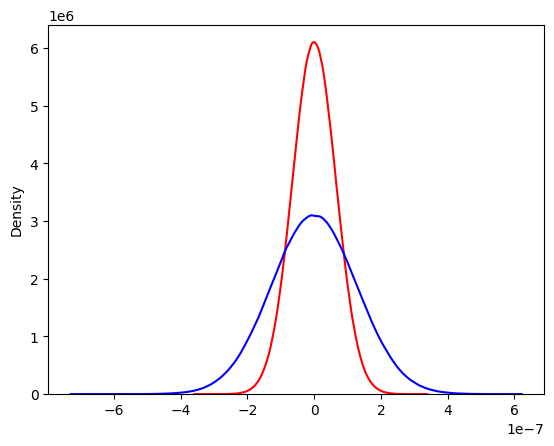

In [393]:
sns.kdeplot(x_trapped, color='red', label='X-axis')
sns.kdeplot(y_trapped, color='blue', label='Y-axis')
plt.show()

Text(0, 0.5, 'Cx,Cy')

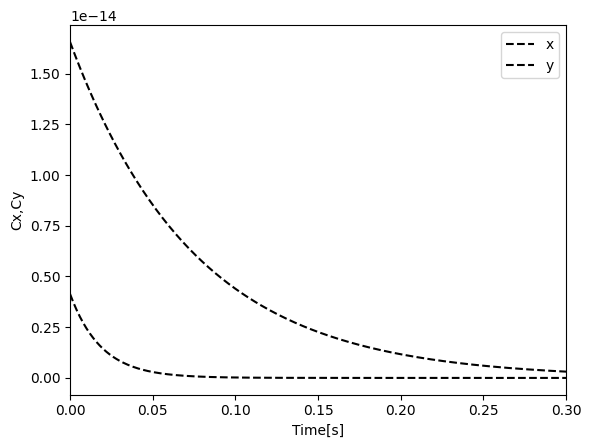

In [17]:
#5.4 c
#Theoretical Autocorrelation 
C_x = np.zeros(int(n_steps))
C_y = np.zeros(int(n_steps))
for n in range(int(n_steps)):
    t = n*dt
    C_x[n] = kB*T/kx*np.exp(-kx*t/gamma)
    C_y[n] = kB*T/ky*np.exp(-ky*t/gamma)



plt.plot(time,C_x,color = 'black', linestyle = '--')
plt.plot(time,C_y,color = 'black', linestyle = '--')
plt.xlim(0,0.3)
plt.legend(["x","y"])
plt.xlabel("Time[s]")
plt.ylabel("Cx,Cy")

In [18]:
#Experimental Autocorrelation 
c_x_experiment = np.correlate(x_trapped,x_trapped,mode="full")
c_x_experiment =c_x_experiment [n_steps-1:] 

c_y_experimnet = c_y_experiment = np.correlate(y_trapped,y_trapped,mode="full")
c_y_experiment = c_y_experiment [n_steps-1:]  


Text(0, 0.5, '$C_x,C_y$')

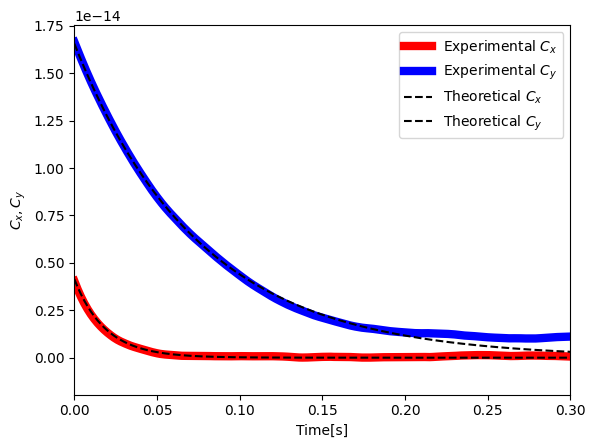

In [14]:
#Plot
plt.plot(time,c_x_experiment*1e-5,color = 'r', linewidth = 6, label ="Experimental $C_x$")
plt.plot(time,c_y_experiment*1e-5, color ='b', linewidth = 6, label ="Experimental $C_y$")
plt.plot(time,C_x,color = 'black', linestyle = '--', label ="Theoretical $C_x$")
plt.plot(time,C_y,color = 'black', linestyle = '--', label ="Theoretical $C_y$")
plt.xlim(0,0.3)
plt.legend()
plt.xlabel("Time[s]")
plt.ylabel("$C_x,C_y$")

In [ ]:
#5.4d
def cal_trapped(k,n_steps,num_trajectories):
    x_trapped = np.zeros((int(num_trajectories),int(n_steps)))
    kx = k
    for n in range(1,n_steps):
        wx = np.random.randn()
        x_trapped[:,n] = x_trapped[:,n-1] - kx*x_trapped[:,n-1]*dt/gamma + np.sqrt(2*kB*T*dt/gamma)*wx    
    x_trapped = np.mean(x_trapped,axis = 0)
    
    return x_trapped

In [ ]:
#Create range of k
kx_range = np.array([0.5e-6,1e-6,2e-6,5e-6,10e-6])
x_trapped_1D = np.zeros((len(kx_range),n_steps))
var_x = np.zeros(len(kx_range))
var_theory_x = np.zeros(len(kx_range))

for i,kx in enumerate(kx_range):
    #Generate position
    x_trapped_1D[i]= cal_trapped(kx,n_steps,num_trajectories)
    #Compute experimental variance
    var_x[i] =np.var(x_trapped_1D[i])
    #Compute theorical variance
    var_theory_x[i] = kB*T/kx


ky_range = np.array([0.5e-6,1e-6,2e-6,5e-6,10e-6])
y_trapped_1D = np.zeros((len(ky_range),n_steps))
var_y = np.zeros(len(ky_range))
var_theory_y = np.zeros(len(ky_range))

for i,ky in enumerate(ky_range):
    #Generate position
    y_trapped_1D[i]= cal_trapped(ky,n_steps,num_trajectories)
    #Compute experimental variance
    var_y[i] =np.var(y_trapped_1D[i])
    #Compute theorical variance
    var_theory_y[i] = kB*T/ky

Text(0.5, 1.0, 'Variance in y-dimension as a function of k')

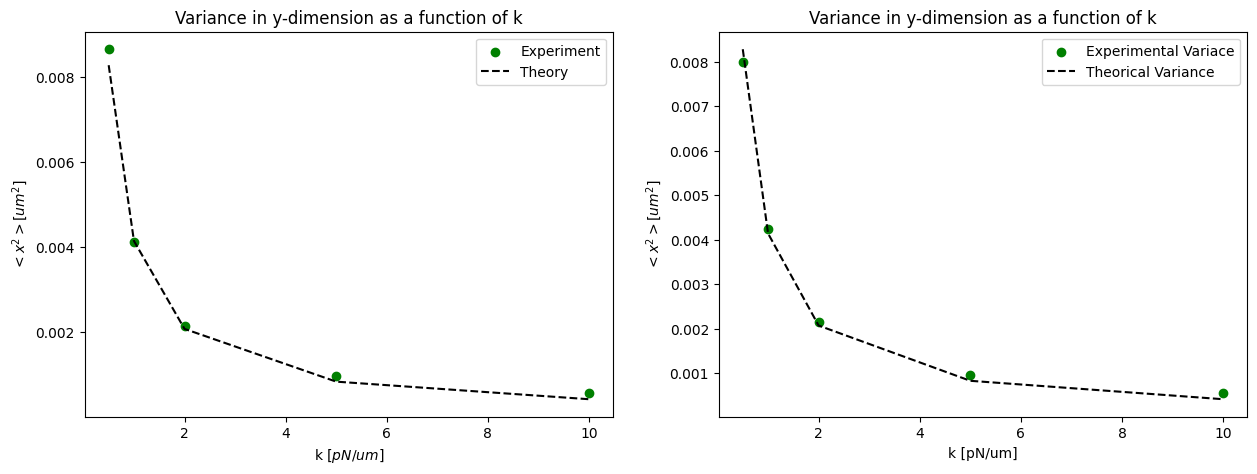

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(kx_range*1e6,var_x*1e12,color = 'green')
plt.plot(kx_range*1e6,var_theory_x*1e12, linestyle='--',color = 'black')
plt.xlabel("k [$pN/um$]")
plt.ylabel('$<x^2> [ um^2]$')
plt.legend(["Experiment","Theory"])
plt.title("Variance in y-dimension as a function of k")

plt.subplot(1,2,2)
plt.scatter(ky_range*1e6,var_y*1e12,color = 'green')
plt.plot(ky_range*1e6,var_theory_y*1e12, linestyle='--',color = 'black')
plt.xlabel("k [pN/um]")
plt.ylabel('$<x^2> [ um^2]$')
plt.legend(["Experimental Variace","Theorical Variance"])
plt.title("Variance in y-dimension as a function of k")
